In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats  
import statsmodels.api as sm

In [6]:
data = pd.read_csv('Food_production.csv')
data.head()

,Emissions per kilogram,Land use per kilogram,Eutrophication per kilogram,Water scarcity per kilogram,Water withdrawals per kilogram,Entity,Year
0,0.488690,0.811485,1.633120,1891.148530,49.402842,Ale,2022
1,0.387011,7.683045,18.723075,402211.960769,6846.472597,Almond butter,2022
2,0.655888,1.370106,4.148876,99916.417295,1246.973783,Almond milk,2022
3,0.602368,8.230927,18.595755,372799.101063,6413.314597,Almonds,2022
4,0.458378,0.660629,1.911657,3286.829617,122.318340,Apple juice,2022


In [7]:
data.describe()

,Emissions per kilogram,Land use per kilogram,Eutrophication per kilogram,Water scarcity per kilogram,Water withdrawals per kilogram,Year
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,6.728361,12.488052,31.060733,24017.042793,773.528414,2022.0
std,13.634058,39.703513,64.749670,44781.648330,1010.200983,0.0
min,0.207276,0.395357,1.205580,0.693874,0.083715,2022.0
25%,1.011181,1.958477,6.111606,6679.746567,172.920622,2022.0
50%,2.290114,3.735736,11.732189,11008.577172,374.797127,2022.0
75%,6.803799,9.666163,24.977988,27556.379736,884.233335,2022.0
max,129.747715,427.331126,553.378404,402211.960769,6846.472597,2022.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Emissions per kilogram          211 non-null    float64
 1   Land use per kilogram           211 non-null    float64
 2   Eutrophication per kilogram     211 non-null    float64
 3   Water scarcity per kilogram     211 non-null    float64
 4   Water withdrawals per kilogram  211 non-null    float64
 5   Entity                          211 non-null    object 
 6   Year                            211 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


### Separando as variáveis de interesse e o conjunto em treino e teste

In [9]:
X = data.drop(columns=['Emissions per kilogram','Entity','Year']) 
y = data['Emissions per kilogram']  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

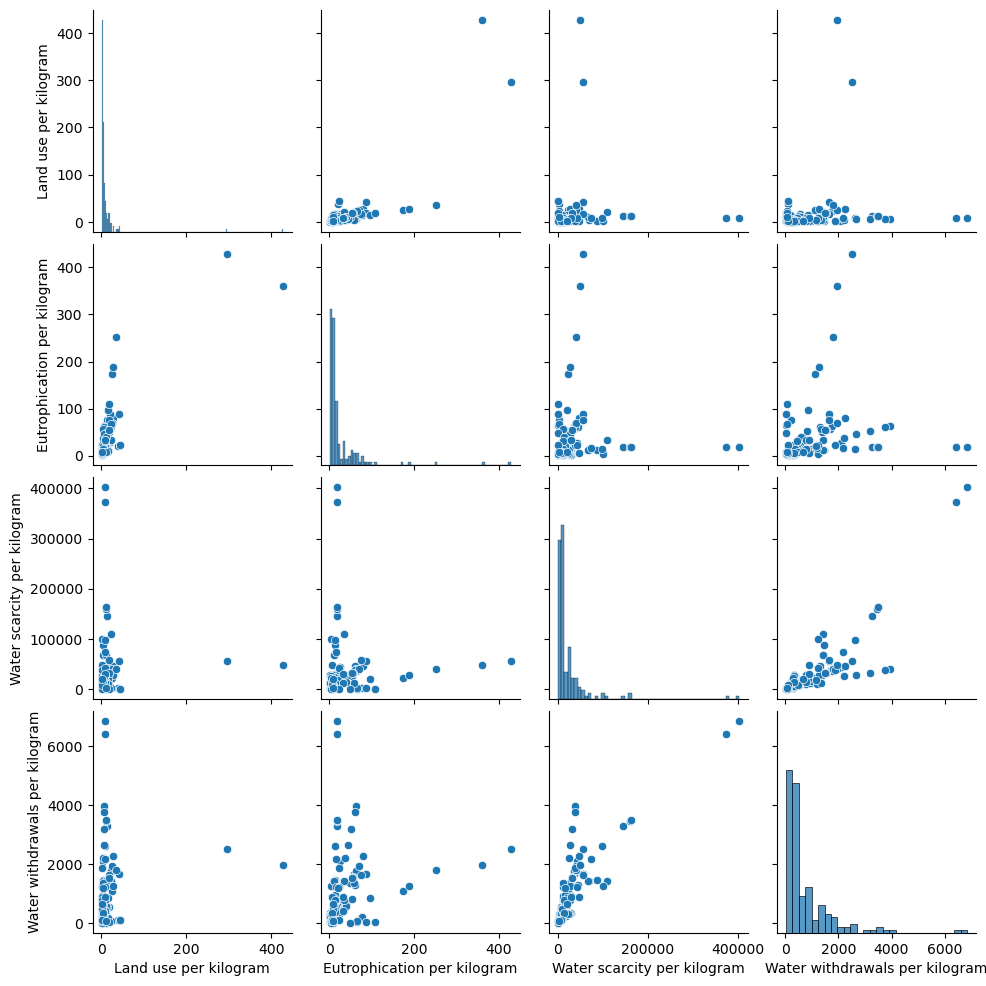

In [11]:
# Criar a matriz de scatter plots
sns.pairplot(X_train, diag_kind="hist")  

plt.show()

### Variables

Y = Emission per kilogram

X = All others

The ideia is try to make models with thats variables using scikit-learn

In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [13]:
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.8967
MSE: 21.0042


### Teste de sobre os Resíduos

((array([-2.14464865, -1.76480145, -1.53935652, -1.37272638, -1.23734893,
         -1.12149384, -1.01901077, -0.9262463 , -0.84083899, -0.7611654 ,
         -0.686055  , -0.6146308 , -0.54621419, -0.48026516, -0.41634304,
         -0.35407972, -0.29316075, -0.23331163, -0.17428744, -0.11586477,
         -0.05783525,  0.        ,  0.05783525,  0.11586477,  0.17428744,
          0.23331163,  0.29316075,  0.35407972,  0.41634304,  0.48026516,
          0.54621419,  0.6146308 ,  0.686055  ,  0.7611654 ,  0.84083899,
          0.9262463 ,  1.01901077,  1.12149384,  1.23734893,  1.37272638,
          1.53935652,  1.76480145,  2.14464865]),
  array([-9.76319437, -7.53474699, -5.24969536, -5.09438927, -2.94611076,
         -2.66146286, -2.5713865 , -2.52226314, -2.12615817, -1.81171361,
         -1.79202524, -1.78431089, -1.71551939, -1.64224242, -1.52619314,
         -1.51989717, -1.42218658, -1.34944273, -1.3279773 , -1.29531371,
         -1.26942519, -1.21382188, -1.18167922, -1.13363605, -

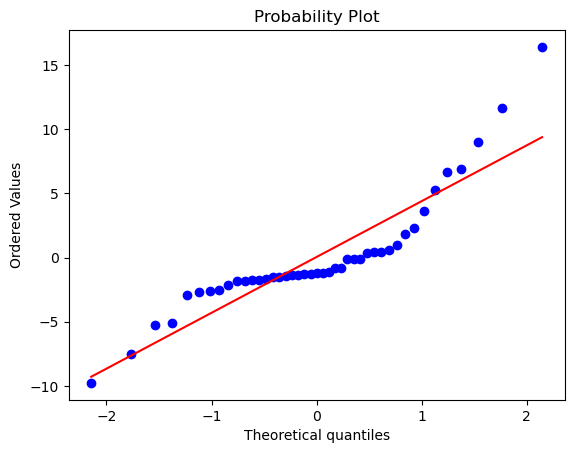

In [14]:
residuos = y_test - y_pred
stats.probplot(residuos, plot=plt)

In [15]:
stats.shapiro(residuos)

ShapiroResult(statistic=0.8476374535809337, pvalue=4.55557628042753e-05)

Vemos que rejeitamos H0, portanto não é normal.

In [16]:
stats.levene(y_test, y_pred)

LeveneResult(statistic=0.20548802037793087, pvalue=0.6514959211729838)

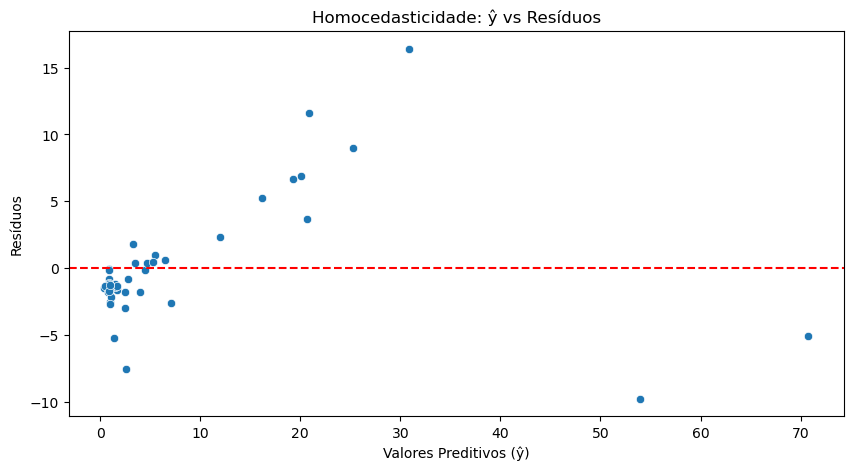

In [24]:
# Gráfico 2: Valores preditos por resíduos (homocedasticidade)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Preditivos (ŷ)")
plt.ylabel("Resíduos")
plt.title("Homocedasticidade: ŷ vs Resíduos")
plt.show()

Não rejeitamos a Hipótese de Homocesdasticidade. 

In [17]:
stats.ttest_ind(y_test, y_pred)

TtestResult(statistic=0.015696831054525077, pvalue=0.9875134780041158, df=84.0)

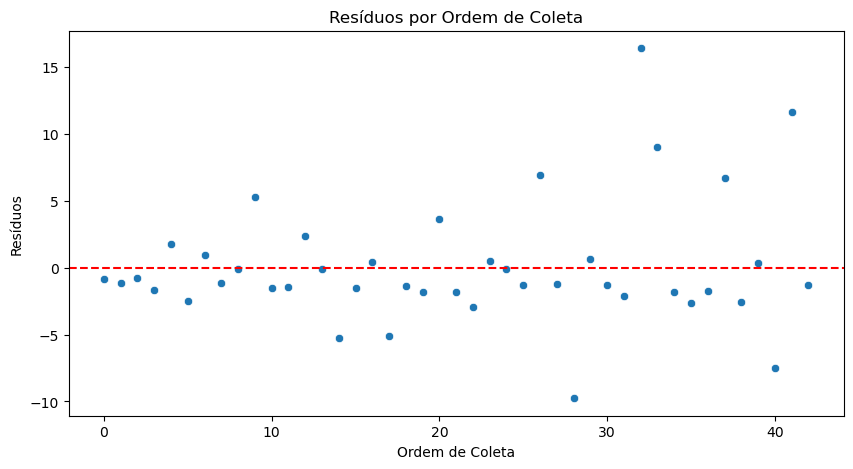

In [22]:
# Gráfico 1: Resíduos por ordem de coleta (teste de independência)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=np.arange(len(y_test)), y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Ordem de Coleta")
plt.ylabel("Resíduos")
plt.title("Resíduos por Ordem de Coleta")
plt.show()


Temos então independência dos Resíduos

In [27]:
eqm = np.mean((y_test - y_pred) ** 2)
reqm = np.sqrt(eqm)

print(f"EQM: {eqm:.4f}")
print(f"REQM: {reqm:.4f}")

EQM: 21.0042
REQM: 4.5830


Precisamos então, partir para outra abordagem. 
Talvez uma tranformação de box-cox ou usar um MLG.